In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

%matplotlib notebook

In [2]:
wf = pd.read_csv('California_wildfires.csv')
wf = wf[~(wf['Year']=='Average')]
wf['Year'].astype(str).astype(int)

0     2000
1     2001
2     2002
3     2003
4     2004
5     2005
6     2006
7     2007
8     2008
9     2009
10    2010
11    2011
12    2012
13    2013
14    2014
15    2015
16    2016
17    2017
18    2018
19    2019
20    2020
Name: Year, dtype: int64

In [3]:
pcp = pd.read_csv('CApcp.csv')
pcp = pcp.iloc[4:,:]
pcp.reset_index()
def setyear(item):
    y = re.findall('([0-9]*)(12)',item)
    return (y[0][0])
pcp['Year'] = pcp['Santa Clara County'].apply(setyear)
pcp.columns = pcp.columns.str.strip()
pcp.columns
pcp = pcp.rename(columns={'California':'Avg pcp'})
pcp = pcp.drop(['Santa Clara County','Precipitation','January-December'],axis=1)
pcp = pcp.set_index('Year')

In [4]:
tavg = pd.read_csv('CAtavg.csv')
tavg = tavg.iloc[4:,:]
tavg.reset_index()
tavg['Year'] = tavg['Santa Clara County'].apply(setyear)
tavg.columns = tavg.columns.str.strip()
tavg.columns
tavg = tavg.rename(columns={'California':'Avg temp'})
tavg = tavg.drop(['Average Temperature','January-December','Santa Clara County'],axis=1)
tavg = tavg.set_index('Year')

In [5]:
tavg_pcp = pd.merge(tavg,pcp,how='outer',left_index=True, right_index=True)
wf = wf.set_index('Year')
final_df = pd.merge(tavg_pcp, wf,how='outer',left_index=True, right_index=True)

In [8]:
import re
def replace_comma(item):
    return item.replace(',',"") 

final_df['Acres'] = final_df['Acres'].apply(replace_comma)
final_df['Acres'].astype(str).astype(int)
final_df['Fires'] = final_df['Fires'].apply(replace_comma)
final_df['Fires'].astype(str).astype(int)
final_df['Hectares'] = final_df['Hectares'].apply(replace_comma)
final_df['Hectares'].astype(str).astype(int)

Year
2000     119393
2001     133193
2002     392500
2003     412970
2004     107237
2005      90058
2006     297858
2007     615269
2008     644940
2009     170837
2010      44325
2011      68208
2012     351914
2013     243473
2014     253150
2015     361531
2016     270951
2017     626627
2018     799289
2019     105147
2020    1779730
Name: Hectares, dtype: int64

<IPython.core.display.Javascript object>


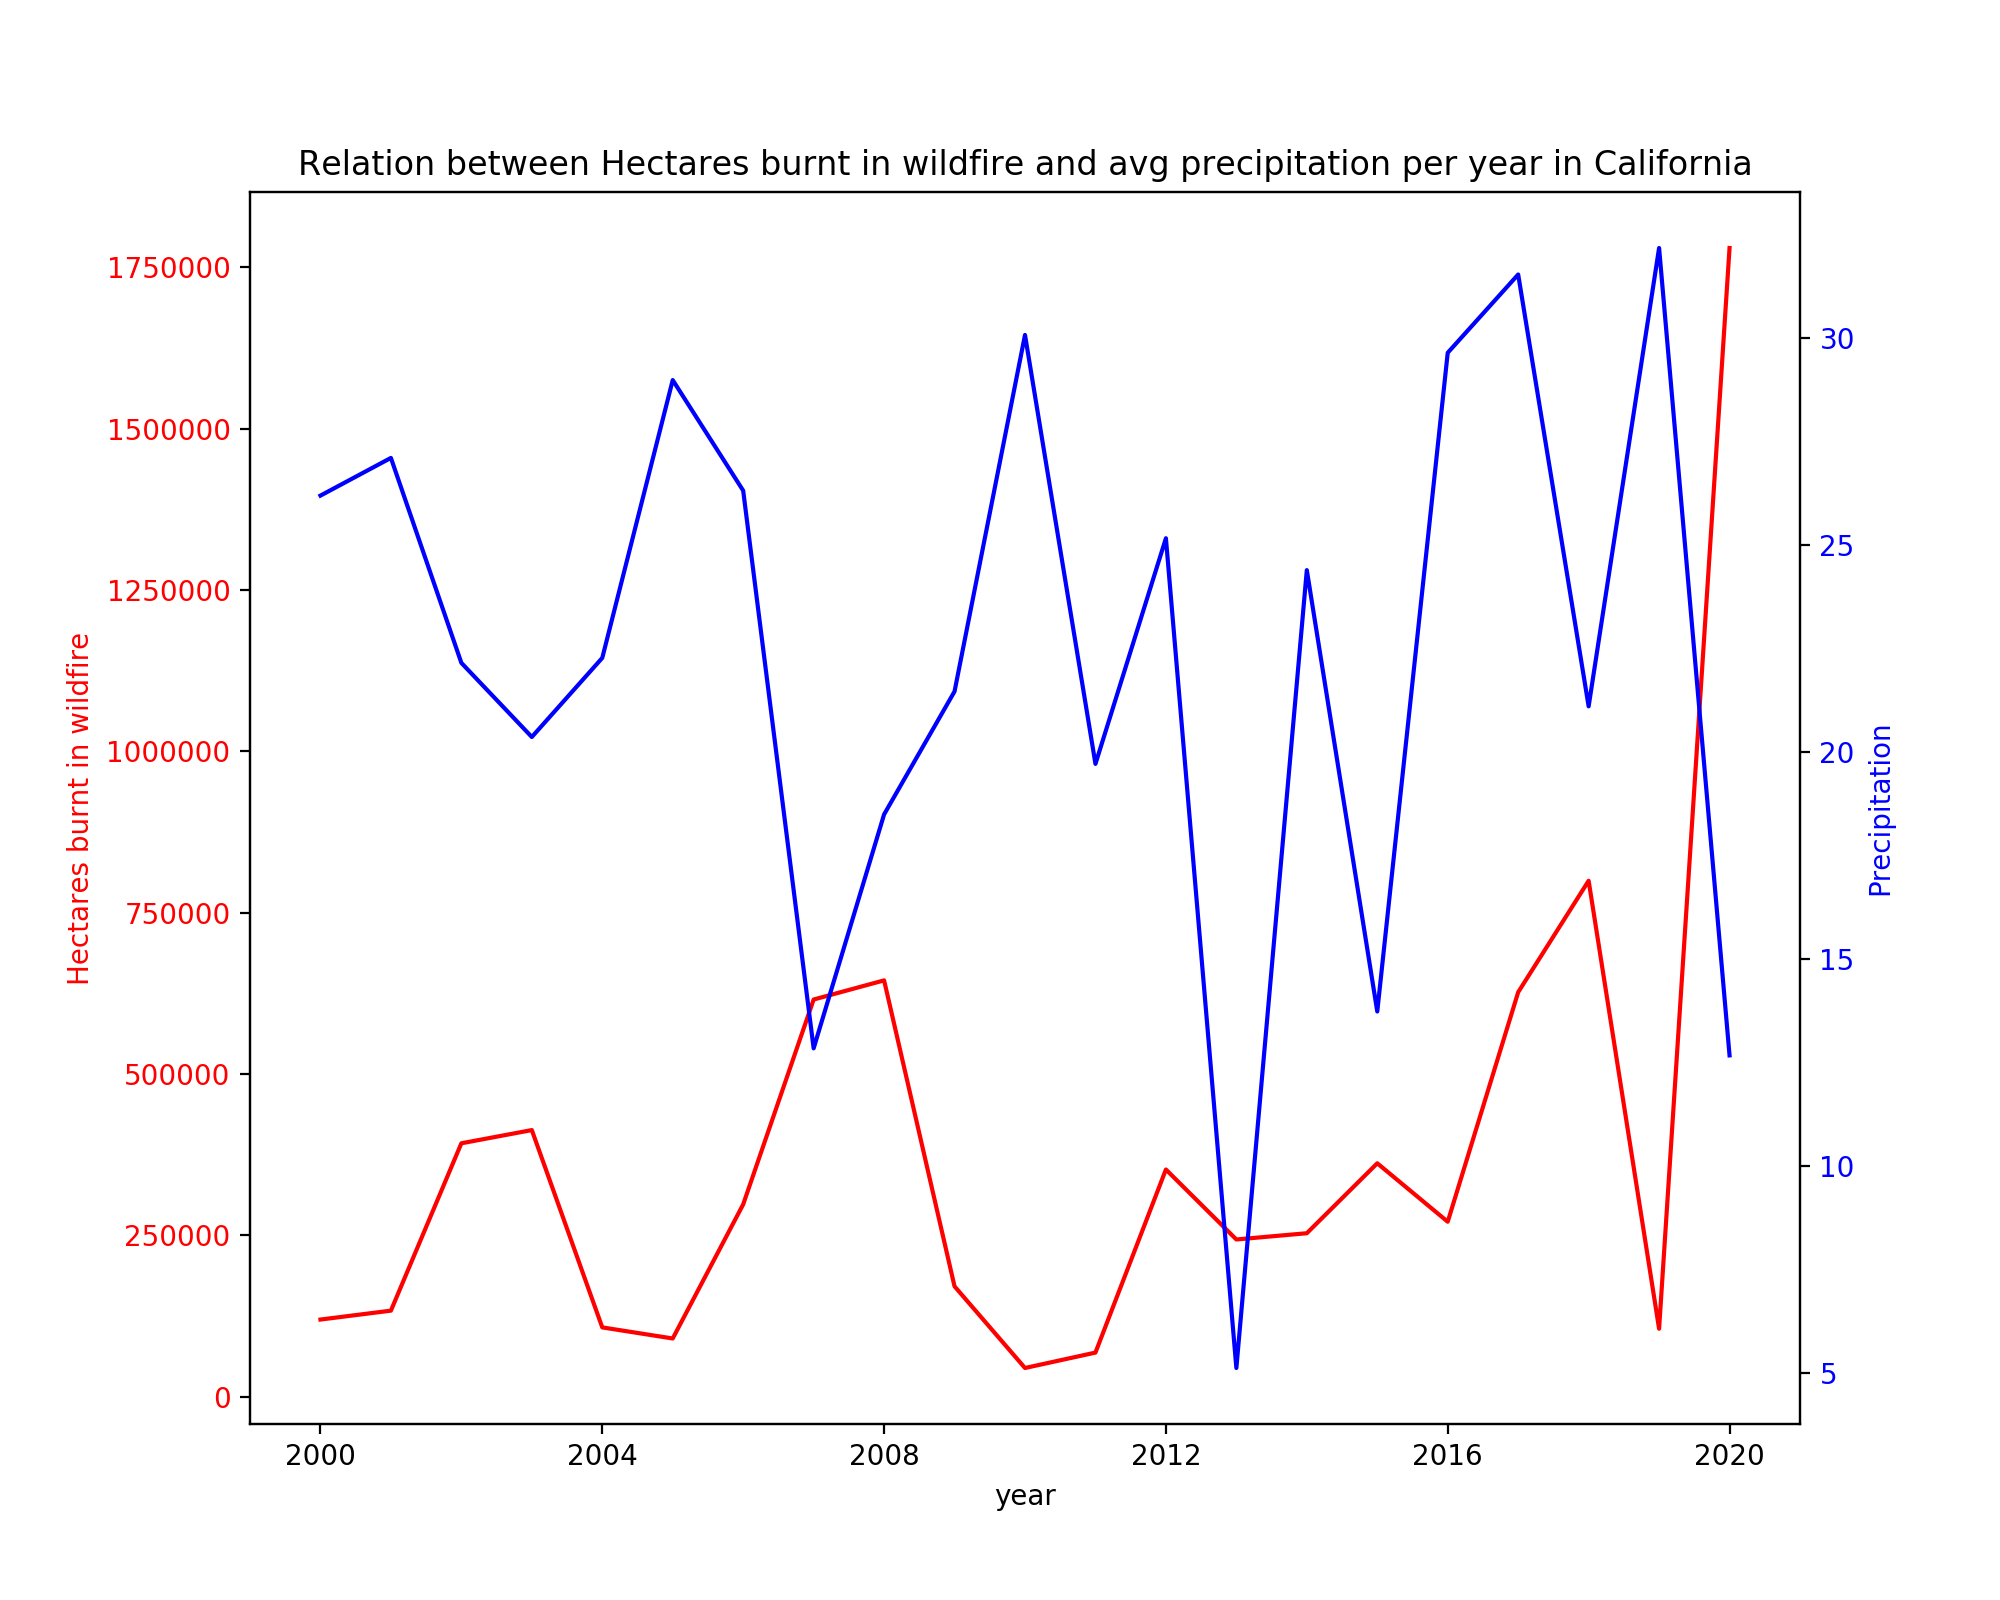

In [10]:
fig,ax1 = plt.subplots(figsize=(10,8))

color = 'tab:red'
ax1.set_xlabel('year')
ax1.set_ylabel('Hectares burnt in wildfire', color='red')
ax1.plot(list(final_df.index), list(final_df['Hectares']), color='red')
ax1.tick_params(axis='y', labelcolor='red')


ax11 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax11.set_ylabel('Precipitation', color='blue')  # we already handled the x-label with ax1
ax11.plot(list(final_df.index), list(final_df['Avg pcp']), color='blue')
ax11.tick_params(axis='y', labelcolor='blue')
plt.xticks(list(final_df.index.astype(str).astype(int))[::4], rotation = 40)
plt.title('Relation between Hectares burnt in wildfire and avg precipitation per year in California')
plt.savefig('california_climate.png')